In [1]:
# Es regressione lineare multipla

In [2]:
import numpy as np

In [5]:
DATA = np.loadtxt("DATA_reg_lin_2.dat")
x = DATA[:,0]    # x
y = DATA[:,1]    # y
display(x,y)

array([ 0.32,  2.83,  3.94,  6.52,  7.51, 11.43,  0.96,  3.32,  4.62,
        6.65,  8.96, 11.45,  0.96,  3.8 ,  5.91,  6.83,  9.56, 12.02])

array([ 1.6 ,  5.3 , 11.88, 15.28, 18.19, 32.55,  1.23,  0.32,  8.03,
       16.47, 16.25, 37.3 ,  0.48,  0.06,  9.91, 14.96, 21.82, 33.19])

In [6]:
# Calcolo dei coefficienti di regressione y = b_0 + b_1 x
n = x.size
x_bar = np.mean(x)
y_bar = np.mean(y)
sig_xy = np.sum((x-x_bar)*(y-y_bar))/n
sig_x_2 = np.sum((x-x_bar)**2.)/n

b_0 = y_bar - sig_xy/sig_x_2*x_bar
b_1 = sig_xy/sig_x_2
display(b_0, b_1)

-4.391330475499407

3.010167753127515

In [7]:
# Calcolo dei coefficienti di regressione usando le formule
# della regressione lineare multipla

In [12]:
x1 = np.ones(n)
x2 = x
X = np.zeros((n,2))
X[:,0] = x1
X[:,1] = x2
display(X)

array([[ 1.  ,  0.32],
       [ 1.  ,  2.83],
       [ 1.  ,  3.94],
       [ 1.  ,  6.52],
       [ 1.  ,  7.51],
       [ 1.  , 11.43],
       [ 1.  ,  0.96],
       [ 1.  ,  3.32],
       [ 1.  ,  4.62],
       [ 1.  ,  6.65],
       [ 1.  ,  8.96],
       [ 1.  , 11.45],
       [ 1.  ,  0.96],
       [ 1.  ,  3.8 ],
       [ 1.  ,  5.91],
       [ 1.  ,  6.83],
       [ 1.  ,  9.56],
       [ 1.  , 12.02]])

In [13]:
XX = np.linalg.pinv(X)

In [25]:
b = np.dot(XX,y)
display(b)
y_hat = np.dot(X,b)
display(y_hat)

array([-4.39133048,  3.01016775])

array([-3.42807679,  4.12744427,  7.46873047, 15.23496327, 18.21502935,
       30.01488694, -1.50156943,  5.60242646,  9.51564454, 15.62628508,
       22.57977259, 30.0750903 , -1.50156943,  7.04730699, 13.39876095,
       16.16811528, 24.38587324, 31.79088592])

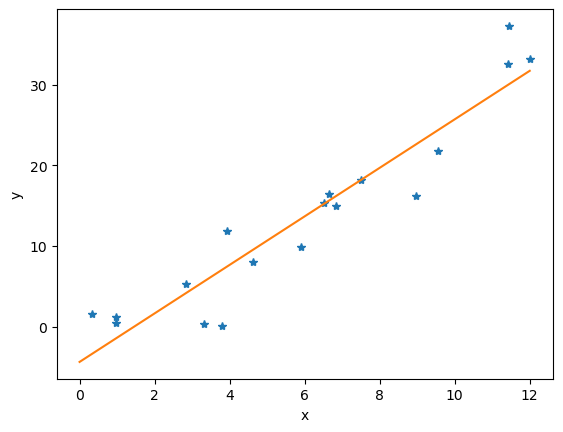

In [26]:
# Grafico
xx = np.linspace(0.,12.,100)
yy = b[0] + b[1]*xx

import matplotlib.pyplot as plt
plt.plot(x, y, '*')
plt.plot(xx, yy)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [27]:
R2 = np.sum((y_hat-y_bar)**2.) / np.sum((y-y_bar)**2.)
display(R2)

0.8905996203945861

In [33]:
# test di indipendenza 
# H0 : b1 = 0
# H1 : b1 <> 0

M = np.linalg.inv(np.dot(X.T,X))
m = M[1][1]
r = y-y_hat
s2 = np.sum(r**2.)/(n-2)
T1 = b[1]/(np.sqrt(s2*m))
display(T1)

from scipy.stats import t
alpha = 0.05
tt = t.ppf(1.-alpha/2.,n-2)
display(tt)

11.412790093360778

2.1199052992210112

In [34]:
# Rigettiamo l'ipotesi nulla
# Pertanto vi è dipendenza di y dal predittore

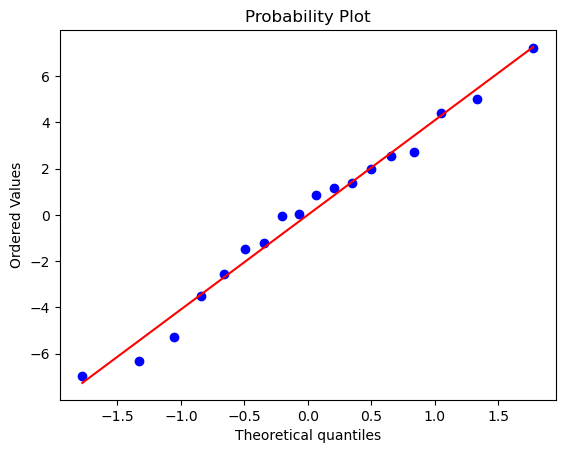

In [35]:
from scipy.stats import probplot
from scipy.stats import norm
fig, ax = plt.subplots(1, 1)
probplot(r, dist=norm, plot=ax)
plt.show()

In [38]:
# Adottiamo un modello quadratico
X2 = np.zeros((n,3))
X2[:,0] = x1
X2[:,1] = x2
X2[:,2] = x2**2.
display(X2)

array([[1.000000e+00, 3.200000e-01, 1.024000e-01],
       [1.000000e+00, 2.830000e+00, 8.008900e+00],
       [1.000000e+00, 3.940000e+00, 1.552360e+01],
       [1.000000e+00, 6.520000e+00, 4.251040e+01],
       [1.000000e+00, 7.510000e+00, 5.640010e+01],
       [1.000000e+00, 1.143000e+01, 1.306449e+02],
       [1.000000e+00, 9.600000e-01, 9.216000e-01],
       [1.000000e+00, 3.320000e+00, 1.102240e+01],
       [1.000000e+00, 4.620000e+00, 2.134440e+01],
       [1.000000e+00, 6.650000e+00, 4.422250e+01],
       [1.000000e+00, 8.960000e+00, 8.028160e+01],
       [1.000000e+00, 1.145000e+01, 1.311025e+02],
       [1.000000e+00, 9.600000e-01, 9.216000e-01],
       [1.000000e+00, 3.800000e+00, 1.444000e+01],
       [1.000000e+00, 5.910000e+00, 3.492810e+01],
       [1.000000e+00, 6.830000e+00, 4.664890e+01],
       [1.000000e+00, 9.560000e+00, 9.139360e+01],
       [1.000000e+00, 1.202000e+01, 1.444804e+02]])

In [48]:
XX2 = np.linalg.pinv(X2)
b2 = np.dot(XX2,y)
display(b2)
y_hat_2 = np.dot(X2,b2)
display(y_hat_2)

array([0.13714061, 0.83177463, 0.17471849])

array([ 0.42119966,  3.8903657 ,  6.12659254, 12.98766393, 16.23790817,
       32.47040378,  1.09666481,  4.82444942,  7.70920065, 13.39493015,
       21.61652091, 32.56699045,  1.09666481,  5.82081914, 11.15551343,
       13.96858652, 24.0570575 , 35.37846842])

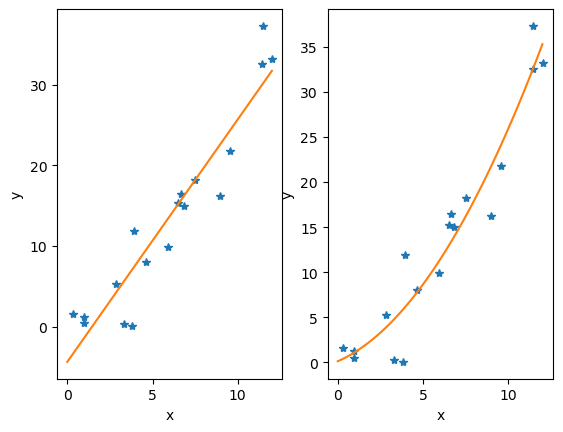

In [51]:
# Grafico
xx = np.linspace(0.,12.,100)
yy = b[0] + b[1]*xx
yy2 = b2[0] + b2[1]*xx + b2[2]*xx**2.

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y, '*')
ax1.plot(xx, yy)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(x, y, '*')
ax2.plot(xx, yy2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

In [59]:
M2 = np.linalg.inv(np.dot(X2.T,X2))
m2 = M2[1][1]
m3 = M2[2][2]
r2 = y-y_hat_2
s2_2 = np.sum(r2**2.)/(n-3)


# test di indipendenza 
# H0 : b1 = 0
# H1 : b1 <> 0

T1_2 = b2[1]/(np.sqrt(s2_2*m2))
display(T1_2)

# test di indipendenza 
# H0 : b2 = 0
# H1 : b2 <> 0

T2_2 = b2[2]/(np.sqrt(s2_2*m3))
display(T2_2)

from scipy.stats import t
tt = t.ppf(1.-alpha/2.,n-3)
display(tt)

1.0028596601849002

2.7266250601819837

2.131449545559323

In [60]:
# Poiché T2_2 > tt si rigetta l'ipotesi nulla
# evidenziando una notevole dipendenza dal termine quadratico

In [61]:
R2 = np.sum((y_hat_2-y_bar)**2.) / np.sum((y-y_bar)**2.)
display(R2)

0.9268534244836728

In [62]:
# Osserviamo che il coefficiente di determinazione è maggiore rispetto
# a quello del modello lineare suggerendo una migliore adeguatezza
# del modello quadratico